In [56]:
# Import libraries for data preprocessing
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import altair as alt

# Import libraries for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
df = pd.read_csv('Datasets\\final.csv')
countries = df['Country'].unique()

In [123]:
# Encode the years and countries as ordinal values
to_encode = ["Year", "Country"]
encoder = OrdinalEncoder()
df[to_encode] = encoder.fit_transform(df[to_encode])

In [124]:
# Separate test data from training data
test = df[df["Year"]==10.0]
test = test.drop(columns = ["gold", "silver", "bronze", "total"])
df = df.drop(test.index)

In [125]:
test.head()

,Country,GDP_share,Population,Number of Athletes,Year
10,0.0,0.060,38972230.0,5,10.0
21,1.0,0.030,2837849.0,9,10.0
32,2.0,0.416,43451666.0,44,10.0
43,3.0,0.003,77700.0,2,10.0
54,4.0,0.159,33428486.0,20,10.0


In [126]:
X = df.drop(columns=["gold", "silver", "bronze", "total"])
y = df["total"]

total_medals_mean = y.mean()
total_medals_std = y.std()

# Standardize the data
X_std = zscore(X)
y_std = zscore(y)
print(X_std)
print(y_std)

       Country  GDP_share  Population  Number of Athletes      Year
0    -1.721191  -0.284579   -0.156772           -0.409099 -1.566699
1    -1.721191  -0.284579   -0.174021           -0.531665 -1.218544
2    -1.721191  -0.284579   -0.172946           -0.475953 -0.870388
3    -1.721191  -0.284579   -0.160072           -0.531665 -0.522233
4    -1.721191  -0.284579   -0.121241           -0.509380 -0.174078
...        ...        ...         ...                 ...       ...
1743  1.721191  -0.255753   -0.161785           -0.353387  0.174078
1744  1.721191  -0.266235   -0.159277           -0.397957  0.522233
1745  1.721191  -0.273573   -0.156282           -0.386814  0.870388
1746  1.721191  -0.268331   -0.150783           -0.453668  1.218544
1747  1.721191  -0.267283   -0.141651           -0.186252  1.566699

[1590 rows x 5 columns]
0      -0.309382
1      -0.309382
2      -0.309382
3      -0.309382
4      -0.309382
          ...   
1743   -0.309382
1744   -0.042712
1745    0.046178
1746  

In [127]:
test_std = (test - X.mean()) / X.std()
test_std.head()

,Country,GDP_share,Population,Number of Athletes,Year
10,-1.720650,-0.253053,0.046902,-0.475803,1.914252
21,-1.698870,-0.268771,-0.230903,-0.431248,1.914252
32,-1.677089,-0.066530,0.081341,-0.041389,1.914252
43,-1.655309,-0.282917,-0.252124,-0.509220,1.914252
54,-1.633529,-0.201183,0.004281,-0.308721,1.914252


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1399, 5)
(350, 5)
(1399,)
(350,)


In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.6460806424811998
[LR] R2: 0.769918855448113


c:\Users\sonson\Desktop\Olympics\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train, y_train)
y_lasso_pred = lasso_model.predict(X_test)
lasso_rmse = mean_squared_error(y_test, y_lasso_pred, squared=False)
lasso_r2 = r2_score(y_test, y_lasso_pred)

print('[Lasso] Root Mean Squared Error: {0}'.format(lasso_rmse))
print('[Lasso] R2: {0}'.format(lasso_r2))

[Lasso] Root Mean Squared Error: 0.6472043341777091
[Lasso] R2: 0.7691178250908691


c:\Users\sonson\Desktop\Olympics\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
ridge_model = RidgeCV(cv=5)
ridge_model.fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_test)
ridge_rmse = mean_squared_error(y_test, y_ridge_pred, squared=False)
ridge_r2 = r2_score(y_test, y_ridge_pred)

print('[Ridge] Root Mean Squared Error: {0}'.format(ridge_rmse))
print('[Ridge] R2: {0}'.format(ridge_r2))

[Ridge] Root Mean Squared Error: 0.6487629034756984
[Ridge] R2: 0.7680044853531142


c:\Users\sonson\Desktop\Olympics\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
en_model = ElasticNetCV(cv=5)
en_model.fit(X_train, y_train)
y_en_pred = en_model.predict(X_test)
en_rmse = mean_squared_error(y_test, y_en_pred, squared=False)
en_r2 = r2_score(y_test, y_en_pred)

print('[EN] Root Mean Squared Error: {0}'.format(en_rmse))
print('[EN] R2: {0}'.format(en_r2))

[EN] Root Mean Squared Error: 0.6477062931835007
[EN] R2: 0.7687595508236231


c:\Users\sonson\Desktop\Olympics\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
param_grid_KNN = dict(n_neighbors = list(range(1,10))) 
print('Running Grid Search...')
model_KNN = KNeighborsRegressor()
grid_KNN = GridSearchCV(model_KNN, param_grid_KNN, cv=5)
grid_search_KNN = grid_KNN.fit(X_train, y_train)
print('Done')
print(grid_search_KNN.best_params_)

Running Grid Search...
Done
{'n_neighbors': 4}


In [113]:
best_model_KNN = KNeighborsRegressor(n_neighbors=4)
best_model_KNN.fit(X_train, y_train)
y_KNN_pred = best_model_KNN.predict(X_test)
KNN_rmse = mean_squared_error(y_test, y_KNN_pred, squared=False)
KNN_r2 = r2_score(y_test, y_KNN_pred)

print('[KNN] Root Mean Squared Error: {0}'.format(KNN_rmse))
print('[KNN] R2: {0}'.format(KNN_r2))

[KNN] Root Mean Squared Error: 0.44688968261488365
[KNN] R2: 0.8899200490924424


c:\Users\sonson\Desktop\Olympics\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [128]:
test_pred = best_model_KNN.predict(test_std)
test_pred = test_pred * total_medals_std + total_medals_mean
test_pred = np.round(test_pred)
test_pred = test_pred.astype(int)
test["total"] = test_pred
test["Country"] = countries
test.to_csv('Datasets\\predictions.csv', index=False)

ValueError: Shape of the passed X data is not correct. Expected 2 columns, got 1.

In [43]:
param_grid_DT = dict(max_depth = [2, 4, 8, 16])
print('Running Grid Search...')
model_DT = DecisionTreeRegressor()
grid_DT = GridSearchCV(model_DT, param_grid_DT, cv=5)
grid_search_DT = grid_DT.fit(X_train, y_train)
print('Done')
print(grid_search_DT.best_params_)

Running Grid Search...
Done
{'max_depth': 2}


In [45]:
best_model_DT = DecisionTreeRegressor(max_depth=2)
best_model_DT.fit(X_train, y_train)
y_DT_pred = best_model_DT.predict(X_test)
DT_rmse = mean_squared_error(y_test, y_DT_pred, squared=False)
DT_r2 = r2_score(y_test, y_DT_pred)

print('[DT] Root Mean Squared Error: {0}'.format(DT_rmse))
print('[DT] R2: {0}'.format(DT_r2))

[DT] Root Mean Squared Error: 0.5756174594179216
[DT] R2: 0.8173685835153315


c:\Users\sonson\Desktop\Olympics\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:
model_SV = SVR(kernel='linear')
model_SV.fit(X_train, y_train)
y_SV_pred = model_SV.predict(X_test)
SV_rmse = mean_squared_error(y_test, y_SV_pred, squared=False)
SV_r2 = r2_score(y_test, y_SV_pred)

print('[SV] Root Mean Squared Error: {0}'.format(SV_rmse))
print('[SV] R2: {0}'.format(SV_r2))

[SV] Root Mean Squared Error: 0.7512194001723674
[SV] R2: 0.6889421535695119


c:\Users\sonson\Desktop\Olympics\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


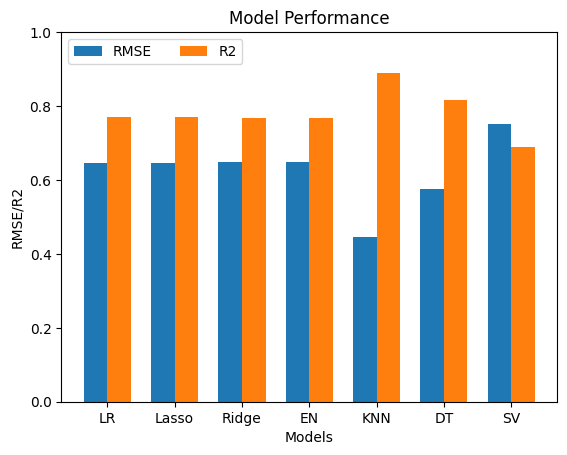

In [48]:
RMSE_Results = [lr_rmse, lasso_rmse, ridge_rmse, en_rmse, KNN_rmse, DT_rmse, SV_rmse]
R2_Results = [lr_r2, lasso_r2, ridge_r2, en_r2, KNN_r2, DT_r2, SV_r2]
labels = ['LR', 'Lasso', 'Ridge', 'EN', 'KNN', 'DT', 'SV']
results_df = pd.DataFrame({'Models': labels, 'RMSE': RMSE_Results, 'R2': R2_Results})
results_df.to_csv('Datasets\\results.csv', index=False)


rg= np.arange(7)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

In [53]:
data = pd.DataFrame({
        'Model': np.tile(labels, 2),
        'Metric': ['RMSE']*len(labels) + ['R2']*len(labels),
        'Value': np.concatenate([RMSE_Results, R2_Results])
    })

bar_chart = alt.Chart(data).mark_bar().encode(
    x=alt.X('Model:N', axis=alt.Axis(title='Models')),
    y=alt.Y('Value:Q', axis=alt.Axis(title='RMSE/R2'), scale=alt.Scale(domain=(0, 1))),
    color='Metric:N',
    column='Metric:N'
).properties(
    title='Model Performance'
).resolve_scale(
    y='shared'
).configure_legend(
    orient='top-left'
)
bar_chart.show()

alt.Chart(...)

In [60]:
!pip install nbformat

In [62]:
rg = np.arange(len(labels))
width = 0.35

fig = go.Figure()

fig.add_trace(go.Bar(
    x=rg,
    y=RMSE_Results,
    width=width,
    name='RMSE'
))

fig.add_trace(go.Bar(
    x=rg + width,
    y=R2_Results,
    width=width,
    name='R2'
))

fig.update_layout(
    title='Model Performance',
    xaxis=dict(
        title='Models',
        tickvals=rg + width / 2,
        ticktext=labels
    ),
    yaxis=dict(
        title='RMSE/R2',
        range=[0, 1]
    ),
    barmode='group',
    legend=dict(
        x=0,
        y=1.1,
        orientation='h'
    )
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed